In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ISLP import load_data
from ISLP.models import summarize

from sklearn.linear_model import LinearRegression

from pygam import (s as s_gam,
                    l as l_gam,
                    f as f_gam,
                    LinearGAM,
                    LogisticGAM)

import warnings
warnings.filterwarnings('ignore')

In [67]:
wage = load_data('Wage')
wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [68]:
y = wage.pop('wage')

In [69]:
# Region has only one category. Discard it.
cat_columns = ['maritl', 'race', 'education', 'jobclass', 'health', 'health_ins']

In [70]:
for col in cat_columns:
    print(f'{col}:')
    print(wage[col].value_counts())
    print()

maritl:
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64

race:
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64

education:
2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: education, dtype: int64

jobclass:
1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

health:
2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64

health_ins:
1. Yes    2083
2. No      917
Name: health_ins, dtype: int64



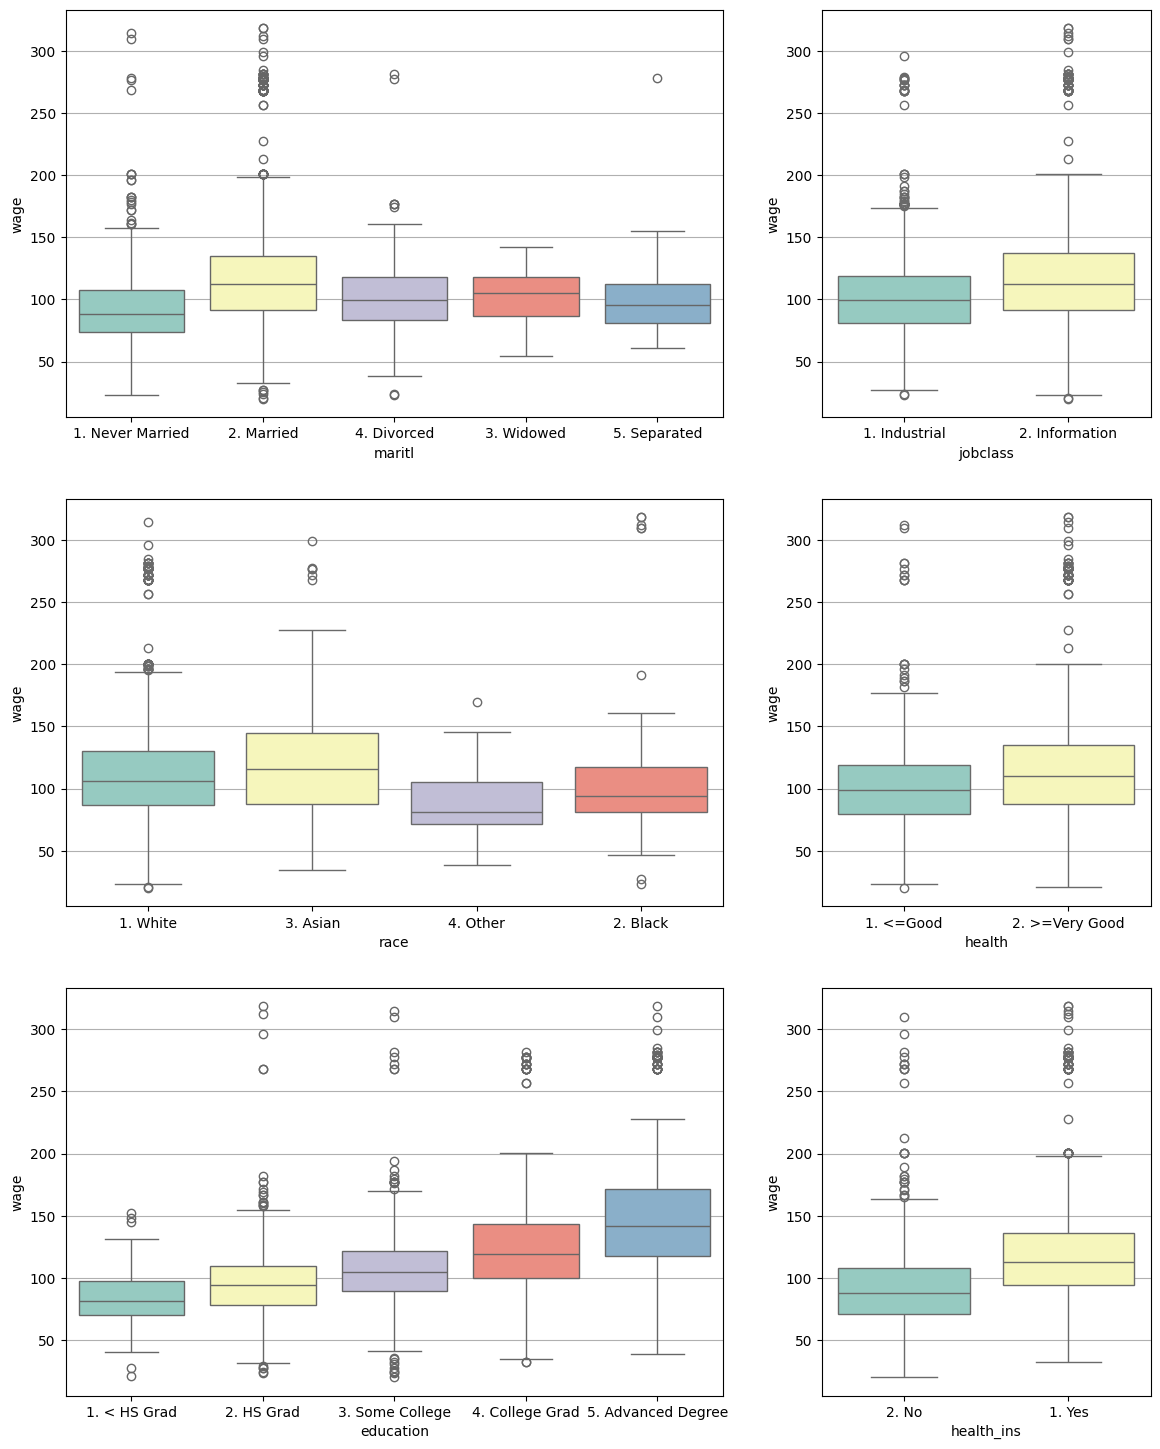

In [71]:
plt.rcParams['axes.grid'] = True

fig, axes = plt.subplots(3,2, figsize = (14,18), width_ratios=[2,1])
sns.boxplot(x="maritl", y=y, data=wage, palette="Set3", ax=axes[0,0])
sns.boxplot(x="race", y=y, data=wage, palette="Set3", ax=axes[1,0])
sns.boxplot(x="education", y=y, data=wage, palette="Set3", ax=axes[2,0])
sns.boxplot(x="jobclass", y=y, data=wage, palette="Set3", ax=axes[0,1])
sns.boxplot(x="health", y=y, data=wage, palette="Set3", ax=axes[1,1])
sns.boxplot(x="health_ins", y=y, data=wage, palette="Set3", ax=axes[2,1])
fig.subplots_adjust(hspace=.2)

In [72]:
# Given the marital status information, I can combine Divorced, Widowed and Separated into one category, named Previously Married. This way, there are three categories: Married, Never Married and Previously Married

# For the race column, I combine Black with Other into a single category called Other Black. This way there are three categories: White, Asian and Other Black

In [73]:
combined_wage = wage.copy()
combined_wage['maritl'] = combined_wage['maritl'].map({
    '2. Married': 'married',
    '1. Never Married': 'never married',
    '4. Divorced': 'previously married',
    '5. Separated': 'previously married',
    '3. Widowed': 'previously married'
})
combined_wage['race'] = combined_wage['race'].map({
    '1. White': 'white',
    '2. Black': 'other black',
    '3. Asian': 'asian',
    '4. Other': 'other black'
})
combined_wage.head()

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage
0,2006,18,never married,white,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063
1,2004,24,never married,white,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273
2,2003,45,married,white,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061
3,2003,43,married,asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393
4,2005,50,previously married,white,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063


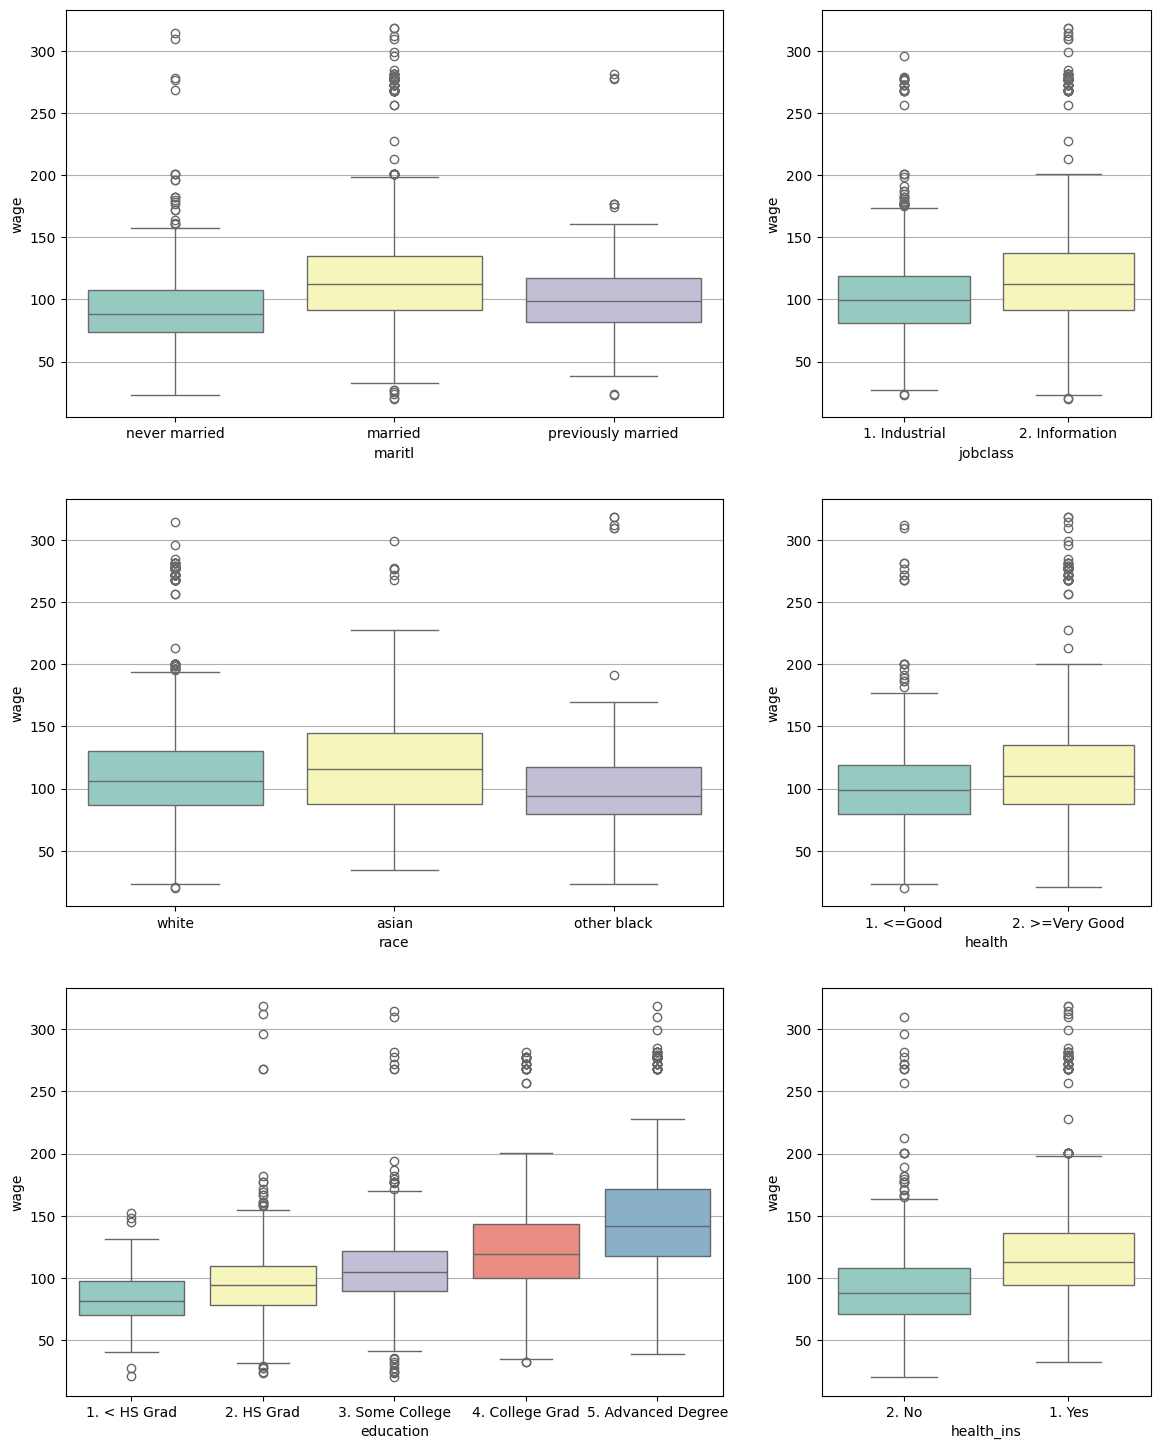

In [74]:
plt.rcParams['axes.grid'] = True

fig, axes = plt.subplots(3,2, figsize = (14,18), width_ratios=[2,1])
sns.boxplot(x="maritl", y=y, data=combined_wage, palette="Set3", ax=axes[0,0])
sns.boxplot(x="race", y=y, data=combined_wage, palette="Set3", ax=axes[1,0])
sns.boxplot(x="education", y=y, data=combined_wage, palette="Set3", ax=axes[2,0])
sns.boxplot(x="jobclass", y=y, data=combined_wage, palette="Set3", ax=axes[0,1])
sns.boxplot(x="health", y=y, data=combined_wage, palette="Set3", ax=axes[1,1])
sns.boxplot(x="health_ins", y=y, data=combined_wage, palette="Set3", ax=axes[2,1])
fig.subplots_adjust(hspace=.2)

In [75]:
combined_wage_dum = pd.get_dummies(combined_wage)
combined_wage_reduced = combined_wage_dum.drop(columns=['health_ins_2. No', 'health_2. >=Very Good', 'jobclass_2. Information'])
combined_wage_reduced.head()

,year,age,logwage,maritl_married,maritl_never married,maritl_previously married,race_asian,race_other black,race_white,education_1. < HS Grad,education_2. HS Grad,education_3. Some College,education_4. College Grad,education_5. Advanced Degree,region_2. Middle Atlantic,jobclass_1. Industrial,health_1. <=Good,health_ins_1. Yes
0,2006,18,4.318063,0,1,0,0,0,1,1,0,0,0,0,1,1,1,0
1,2004,24,4.255273,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
2,2003,45,4.875061,1,0,0,0,0,1,0,0,1,0,0,1,1,1,1
3,2003,43,5.041393,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1
4,2005,50,4.318063,0,0,1,0,0,1,0,1,0,0,0,1,0,1,1


In [81]:
# GAMs
# The GAM is specifed by associating each column of a model matrix with a particular smoothing operation: 
# s for smoothing spline; 
# l for linear
# f for factor or categorical variables
print(combined_wage.columns)
column_name_to_index = {name: idx for idx, name in enumerate(combined_wage.columns)}

smooth_terms = ['year', 'age', 'logwage']
factor_terms = ['maritl', 'race', 'education', 'jobclass', 'health', 'health_ins']

terms = [s_gam(column_name_to_index[term]) for term in smooth_terms] + \
        [f_gam(column_name_to_index[term]) for term in factor_terms]

gam = LinearGAM(sum(terms)).fit(combined_wage, y)
gam.summary()

Index(['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage'],
      dtype='object')


ValueError: terms must be instances of Term or TermList, but found term: 0